# Pranav Submission

## 1a - Two parameters need to be learned, they are w & b

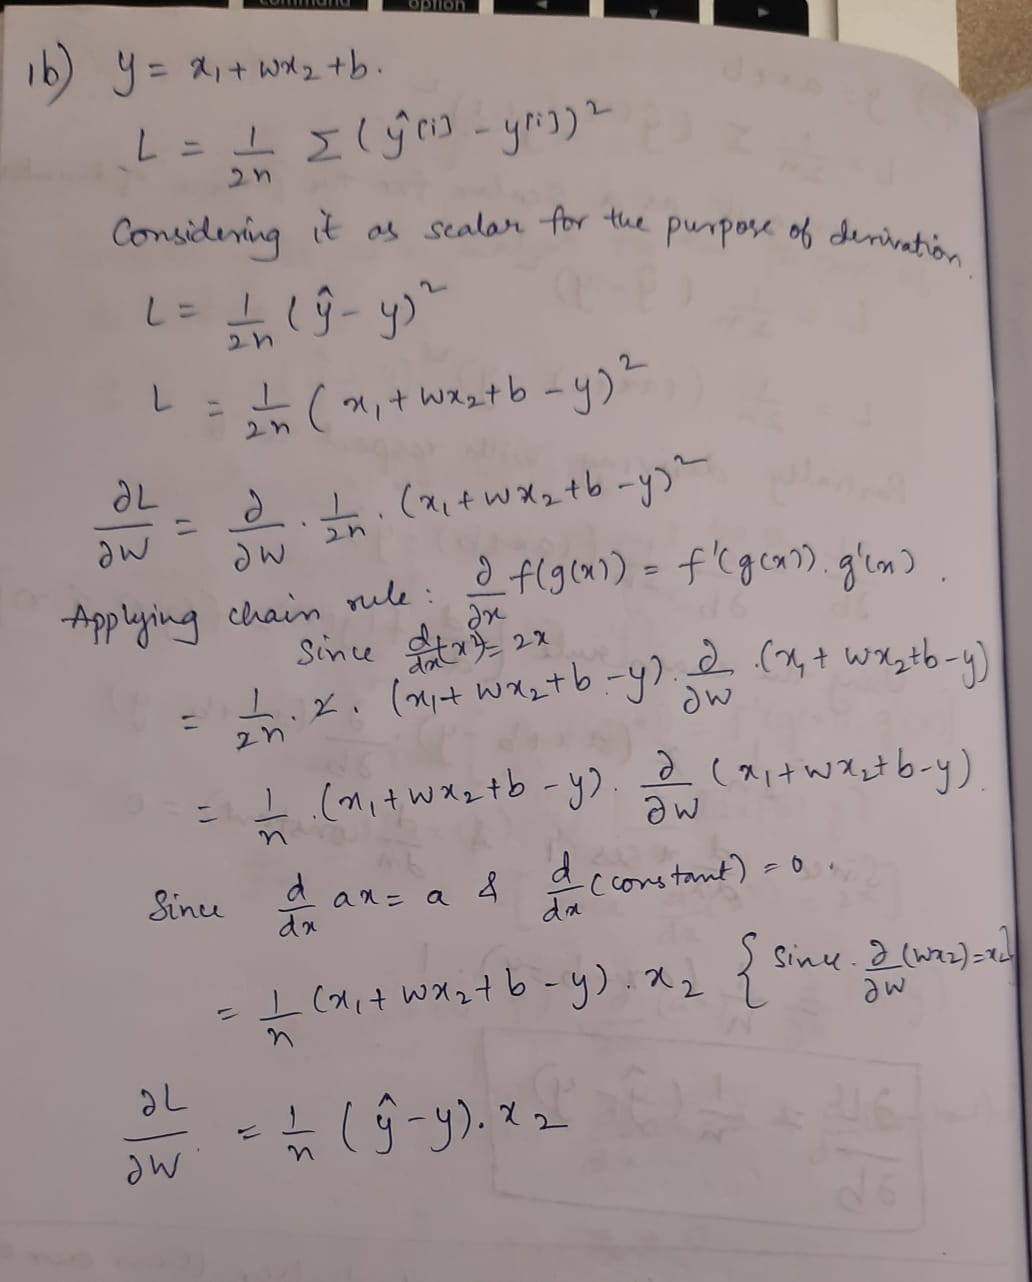

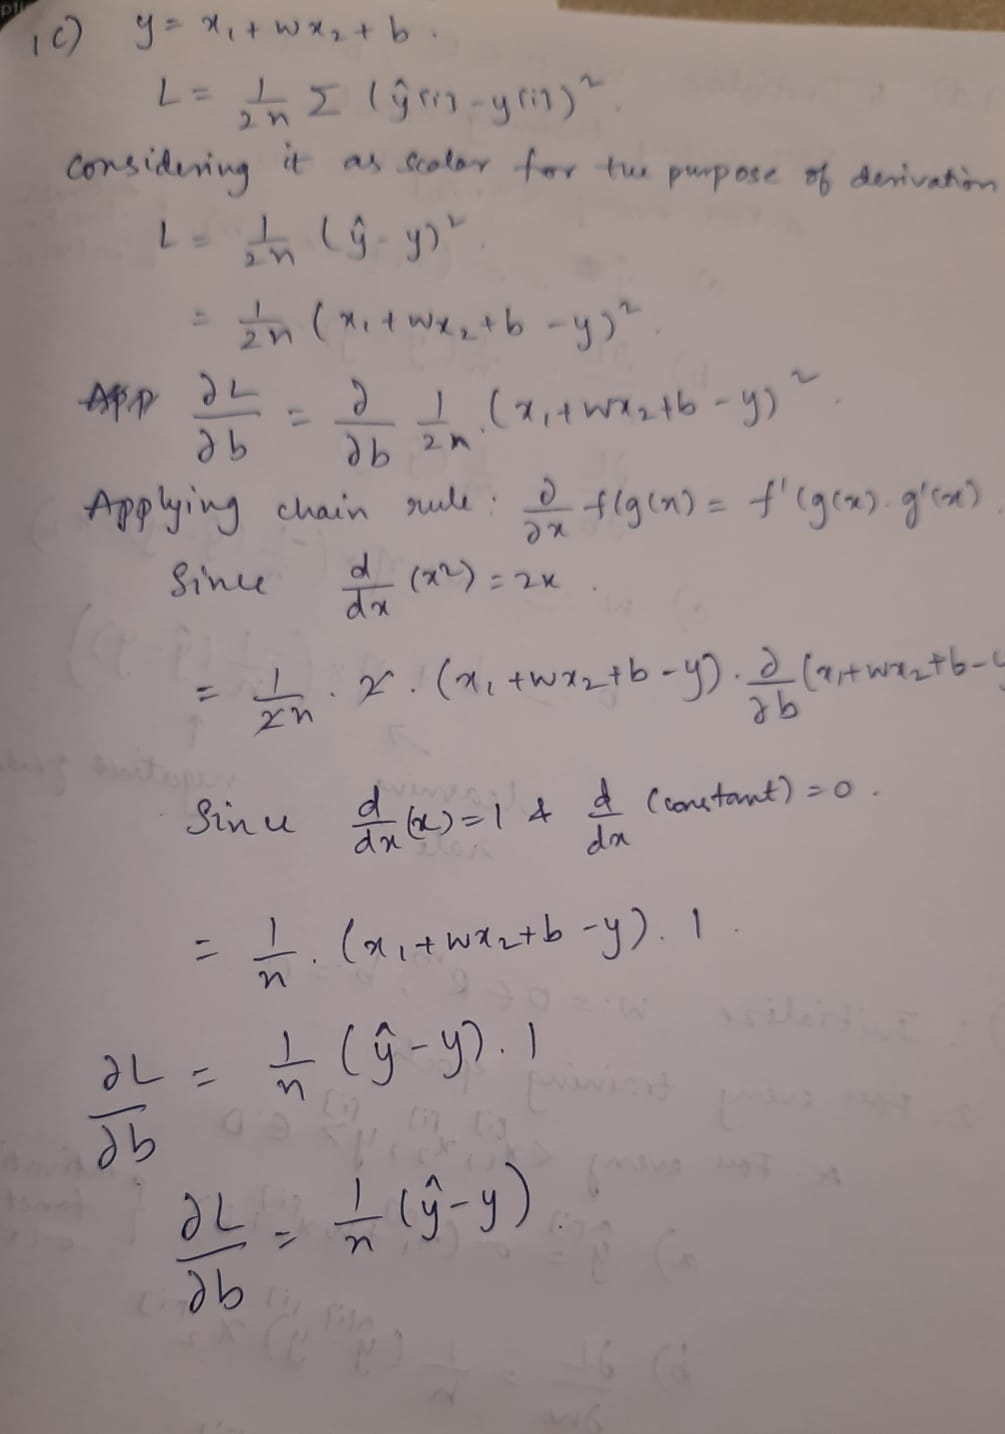

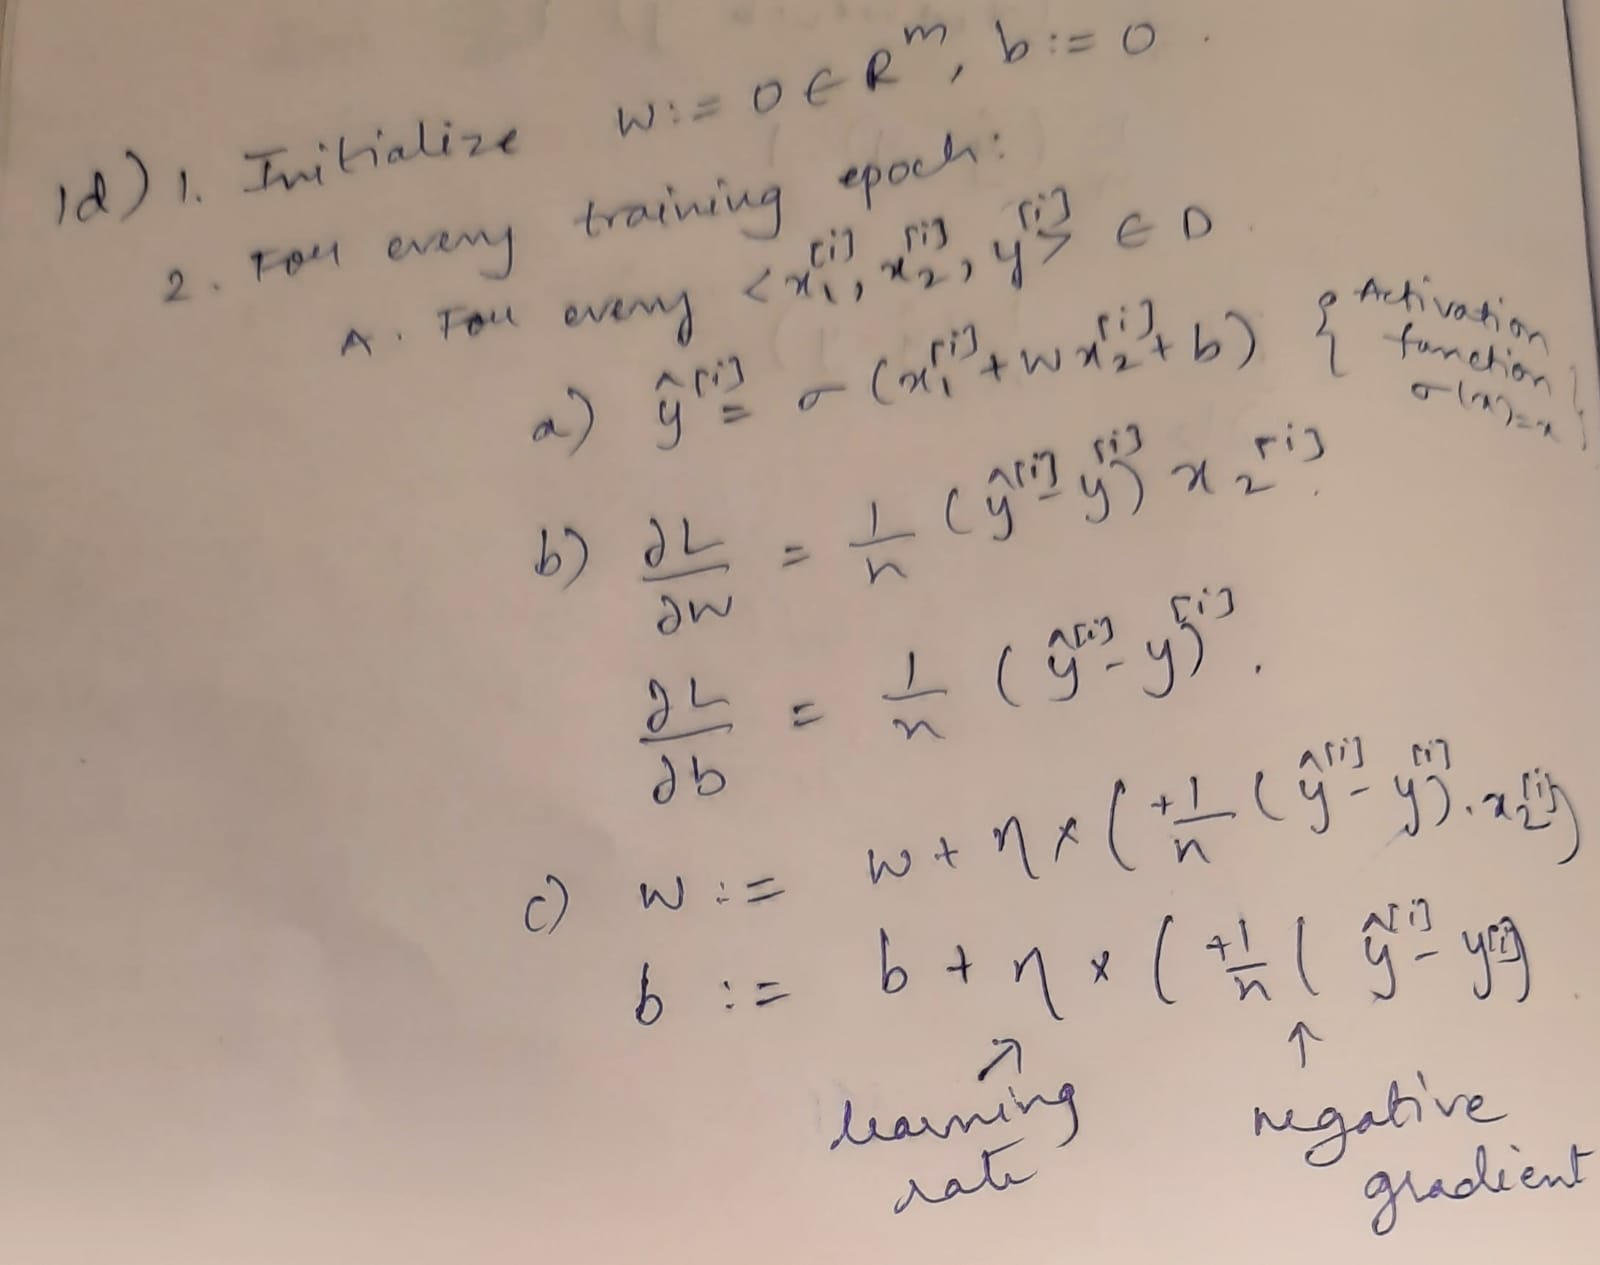

## 1e solution

In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import torch
%matplotlib inline

In [ ]:
df = pd.read_csv('./linreg-data.csv', index_col=0)

In [ ]:
# Assign features and target

X1 = torch.tensor(df[['x1']].values, dtype=torch.float)
X2 = torch.tensor(df[['x2']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.float)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X1, X2, y = X1[shuffle_idx], X2[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X1_train, X1_test = X1[shuffle_idx[:percent70]], X1[shuffle_idx[percent70:]]
X2_train, X2_test = X2[shuffle_idx[:percent70]], X2[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu1, sigma1 = X1_train.mean(dim=0), X1_train.std(dim=0)
mu2, sigma2 = X2_train.mean(dim=0), X2_train.std(dim=0)
X1_train = (X1_train - mu1) / sigma1
X1_test = (X1_test - mu1) / sigma1

X2_train = (X2_train - mu2) / sigma2
X2_test = (X2_test - mu2) / sigma2

In [ ]:
X1_train.shape

torch.Size([700, 1])

In [ ]:
class LinearRegression():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1,
                                   dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)

    def forward(self, x1, x2):
        netinputs = torch.add(torch.add(x1, torch.mm(x2, self.weights)), self.bias)
        activations = netinputs
        return activations.view(-1)

    def backward(self, x1, x2, yhat, y):

        grad_loss_yhat = 2*(yhat - y)

        grad_yhat_weights = x2
        grad_yhat_bias = 1.

        # Chain rule: inner times outer
        grad_loss_weights =  torch.mm(grad_yhat_weights.t(),
                                         grad_loss_yhat.view(-1, 1)) / y.size(0)

        grad_loss_bias = torch.sum(grad_yhat_bias*grad_loss_yhat) / y.size(0)

        # return negative gradient
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

In [ ]:
####################################################
##### Training and evaluation wrappers
###################################################

def loss(yhat, y):
    return torch.mean((yhat - y)**2)


def train(model, x1, x2, y, num_epochs, learning_rate=0.01):
    cost = []
    for e in range(num_epochs):

        #### Compute outputs ####
        yhat = model.forward(x1, x2)

        #### Compute gradients ####
        negative_grad_w, negative_grad_b = model.backward(x1, x2, yhat, y)

        #### Update weights ####
        model.weights += learning_rate * negative_grad_w
        model.bias += learning_rate * negative_grad_b

        #### Logging ####
        yhat = model.forward(x1, x2) # not that this is a bit wasteful here
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)

    return cost

In [ ]:
model = LinearRegression(num_features=X1_train.size(1))
cost = train(model,
             X1_train, X2_train, y_train,
             num_epochs=100,
             learning_rate=0.05)

Epoch: 001 | MSE: 1533.73303
Epoch: 002 | MSE: 1313.30566
Epoch: 003 | MSE: 1134.70264
Epoch: 004 | MSE: 989.98828
Epoch: 005 | MSE: 872.73260
Epoch: 006 | MSE: 777.72528
Epoch: 007 | MSE: 700.74481
Epoch: 008 | MSE: 638.37091
Epoch: 009 | MSE: 587.83191
Epoch: 010 | MSE: 546.88239
Epoch: 011 | MSE: 513.70288
Epoch: 012 | MSE: 486.81885
Epoch: 013 | MSE: 465.03577
Epoch: 014 | MSE: 447.38602
Epoch: 015 | MSE: 433.08517
Epoch: 016 | MSE: 421.49777
Epoch: 017 | MSE: 412.10898
Epoch: 018 | MSE: 404.50171
Epoch: 019 | MSE: 398.33777
Epoch: 020 | MSE: 393.34344
Epoch: 021 | MSE: 389.29678
Epoch: 022 | MSE: 386.01791
Epoch: 023 | MSE: 383.36118
Epoch: 024 | MSE: 381.20853
Epoch: 025 | MSE: 379.46439
Epoch: 026 | MSE: 378.05112
Epoch: 027 | MSE: 376.90604
Epoch: 028 | MSE: 375.97821
Epoch: 029 | MSE: 375.22647
Epoch: 030 | MSE: 374.61737
Epoch: 031 | MSE: 374.12378
Epoch: 032 | MSE: 373.72391
Epoch: 033 | MSE: 373.39981
Epoch: 034 | MSE: 373.13733
Epoch: 035 | MSE: 372.92462
Epoch: 036 | MSE:

## Evluating & Plotting

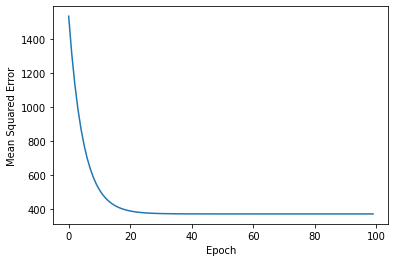

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

Train MSE: 372.01620
Test MSE: 409.19485


In [ ]:
print('Weights', model.weights)
print('Bias', model.bias)

Weights tensor([[37.8872]])
Bias tensor([-0.5464])


## 1f  The second weight and the bias terms are both similar to the model in the lecture video, however even in the first video the final weight of x1 was 0.36, the value we have for x1 is 1, so the accuracies were comparable to the model in lecture video

## Bonus Question

Learning rate - 0.001

In [ ]:
model = LinearRegression(num_features=X1_train.size(1))
cost = train(model,
             X1_train, X2_train, y_train,
             num_epochs=100,
             learning_rate=0.001)

Epoch: 001 | MSE: 1800.05798
Epoch: 002 | MSE: 1794.35962
Epoch: 003 | MSE: 1788.68408
Epoch: 004 | MSE: 1783.03125
Epoch: 005 | MSE: 1777.40088
Epoch: 006 | MSE: 1771.79285
Epoch: 007 | MSE: 1766.20752
Epoch: 008 | MSE: 1760.64429
Epoch: 009 | MSE: 1755.10327
Epoch: 010 | MSE: 1749.58423
Epoch: 011 | MSE: 1744.08728
Epoch: 012 | MSE: 1738.61230
Epoch: 013 | MSE: 1733.15930
Epoch: 014 | MSE: 1727.72791
Epoch: 015 | MSE: 1722.31824
Epoch: 016 | MSE: 1716.93005
Epoch: 017 | MSE: 1711.56360
Epoch: 018 | MSE: 1706.21826
Epoch: 019 | MSE: 1700.89441
Epoch: 020 | MSE: 1695.59180
Epoch: 021 | MSE: 1690.31030
Epoch: 022 | MSE: 1685.05005
Epoch: 023 | MSE: 1679.81055
Epoch: 024 | MSE: 1674.59216
Epoch: 025 | MSE: 1669.39429
Epoch: 026 | MSE: 1664.21729
Epoch: 027 | MSE: 1659.06104
Epoch: 028 | MSE: 1653.92542
Epoch: 029 | MSE: 1648.81018
Epoch: 030 | MSE: 1643.71558
Epoch: 031 | MSE: 1638.64111
Epoch: 032 | MSE: 1633.58679
Epoch: 033 | MSE: 1628.55273
Epoch: 034 | MSE: 1623.53870
Epoch: 035 | M

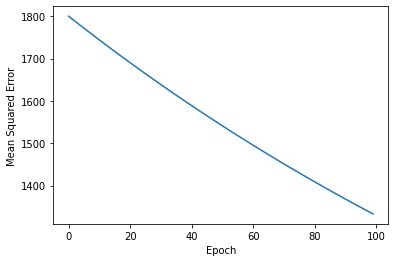

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

Learning rate - 0.01

In [ ]:
model = LinearRegression(num_features=X1_train.size(1))
cost = train(model,
             X1_train, X2_train, y_train,
             num_epochs=100,
             learning_rate=0.001)

Epoch: 001 | MSE: 1800.05798
Epoch: 002 | MSE: 1794.35962
Epoch: 003 | MSE: 1788.68408
Epoch: 004 | MSE: 1783.03125
Epoch: 005 | MSE: 1777.40088
Epoch: 006 | MSE: 1771.79285
Epoch: 007 | MSE: 1766.20752
Epoch: 008 | MSE: 1760.64429
Epoch: 009 | MSE: 1755.10327
Epoch: 010 | MSE: 1749.58423
Epoch: 011 | MSE: 1744.08728
Epoch: 012 | MSE: 1738.61230
Epoch: 013 | MSE: 1733.15930
Epoch: 014 | MSE: 1727.72791
Epoch: 015 | MSE: 1722.31824
Epoch: 016 | MSE: 1716.93005
Epoch: 017 | MSE: 1711.56360
Epoch: 018 | MSE: 1706.21826
Epoch: 019 | MSE: 1700.89441
Epoch: 020 | MSE: 1695.59180
Epoch: 021 | MSE: 1690.31030
Epoch: 022 | MSE: 1685.05005
Epoch: 023 | MSE: 1679.81055
Epoch: 024 | MSE: 1674.59216
Epoch: 025 | MSE: 1669.39429
Epoch: 026 | MSE: 1664.21729
Epoch: 027 | MSE: 1659.06104
Epoch: 028 | MSE: 1653.92542
Epoch: 029 | MSE: 1648.81018
Epoch: 030 | MSE: 1643.71558
Epoch: 031 | MSE: 1638.64111
Epoch: 032 | MSE: 1633.58679
Epoch: 033 | MSE: 1628.55273
Epoch: 034 | MSE: 1623.53870
Epoch: 035 | M

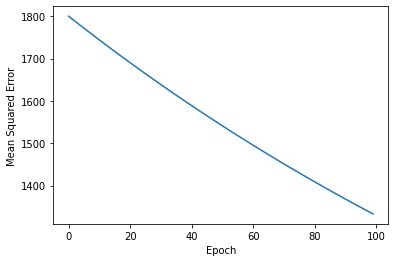

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

Learning rate - 0.1

In [ ]:
model = LinearRegression(num_features=X1_train.size(1))
cost = train(model,
             X1_train, X2_train, y_train,
             num_epochs=100,
             learning_rate=0.1)

Epoch: 001 | MSE: 1290.28015
Epoch: 002 | MSE: 960.12476
Epoch: 003 | MSE: 748.67462
Epoch: 004 | MSE: 613.24976
Epoch: 005 | MSE: 526.51587
Epoch: 006 | MSE: 470.96671
Epoch: 007 | MSE: 435.38974
Epoch: 008 | MSE: 412.60419
Epoch: 009 | MSE: 398.01108
Epoch: 010 | MSE: 388.66476
Epoch: 011 | MSE: 382.67889
Epoch: 012 | MSE: 378.84521
Epoch: 013 | MSE: 376.38986
Epoch: 014 | MSE: 374.81735
Epoch: 015 | MSE: 373.81021
Epoch: 016 | MSE: 373.16519
Epoch: 017 | MSE: 372.75204
Epoch: 018 | MSE: 372.48746
Epoch: 019 | MSE: 372.31802
Epoch: 020 | MSE: 372.20950
Epoch: 021 | MSE: 372.14001
Epoch: 022 | MSE: 372.09549
Epoch: 023 | MSE: 372.06702
Epoch: 024 | MSE: 372.04871
Epoch: 025 | MSE: 372.03702
Epoch: 026 | MSE: 372.02954
Epoch: 027 | MSE: 372.02478
Epoch: 028 | MSE: 372.02170
Epoch: 029 | MSE: 372.01971
Epoch: 030 | MSE: 372.01840
Epoch: 031 | MSE: 372.01764
Epoch: 032 | MSE: 372.01715
Epoch: 033 | MSE: 372.01678
Epoch: 034 | MSE: 372.01657
Epoch: 035 | MSE: 372.01642
Epoch: 036 | MSE: 3

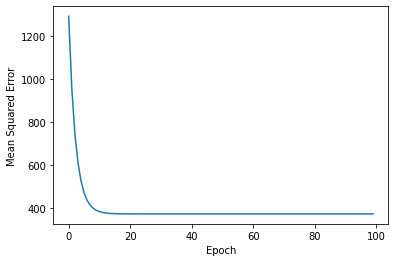

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

Learning rate - 1

In [ ]:
model = LinearRegression(num_features=X1_train.size(1))
cost = train(model,
             X1_train, X2_train, y_train,
             num_epochs=100,
             learning_rate=1)

Epoch: 001 | MSE: 1797.59644
Epoch: 002 | MSE: 1789.46265
Epoch: 003 | MSE: 1781.37268
Epoch: 004 | MSE: 1773.32996
Epoch: 005 | MSE: 1765.33374
Epoch: 006 | MSE: 1757.38708
Epoch: 007 | MSE: 1749.48376
Epoch: 008 | MSE: 1741.62817
Epoch: 009 | MSE: 1733.81360
Epoch: 010 | MSE: 1726.04675
Epoch: 011 | MSE: 1718.32288
Epoch: 012 | MSE: 1710.64319
Epoch: 013 | MSE: 1703.00647
Epoch: 014 | MSE: 1695.41370
Epoch: 015 | MSE: 1687.86462
Epoch: 016 | MSE: 1680.35925
Epoch: 017 | MSE: 1672.89441
Epoch: 018 | MSE: 1665.47412
Epoch: 019 | MSE: 1658.09851
Epoch: 020 | MSE: 1650.76013
Epoch: 021 | MSE: 1643.46643
Epoch: 022 | MSE: 1636.21838
Epoch: 023 | MSE: 1629.00964
Epoch: 024 | MSE: 1621.84290
Epoch: 025 | MSE: 1614.71228
Epoch: 026 | MSE: 1607.62231
Epoch: 027 | MSE: 1600.57434
Epoch: 028 | MSE: 1593.56213
Epoch: 029 | MSE: 1586.59570
Epoch: 030 | MSE: 1579.66980
Epoch: 031 | MSE: 1572.78479
Epoch: 032 | MSE: 1565.93201
Epoch: 033 | MSE: 1559.12183
Epoch: 034 | MSE: 1552.35327
Epoch: 035 | M

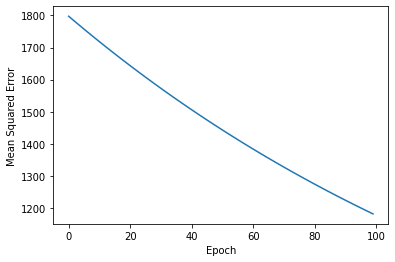

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()